# 심화학습 : 의사결정 트리와 랜덤 포레스트

In [51]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

Random Forest는 의사결정 트리(decision tress)를 기반으로 한 **앙상블 학습 방법 (ensemble learner)** 의 한 예이다.


## 의사 결정 트리


### 의사 결정 트리 생성하기
4개의 클래스 레이블 중 하나를 가지는 다음 2차원 데이터를 생각해보자

In [52]:
from sklearn.datasets import make_blobs

In [62]:
#임의의 데이터 생성
X, y =make_blobs(n_samples=150, n_features=2)

In [63]:
X.shape, y.shape

((150, 2), (150,))

In [64]:
import numpy as np

np.unique(y)

array([0, 1, 2])

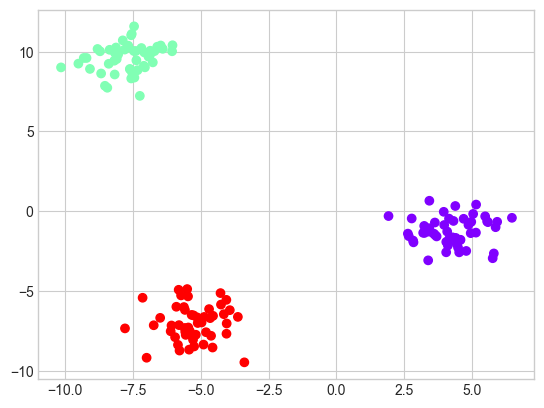

In [65]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap='rainbow')

In [66]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier()

In [67]:
y_pred = model.predict(X)
y_pred.shape

(150,)

In [78]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=50),
                         np.linspace(*ylim, num=50))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)
    # ax.scatter(xx,yy, s=1)
    ax.set(xlim=xlim, ylim=ylim)

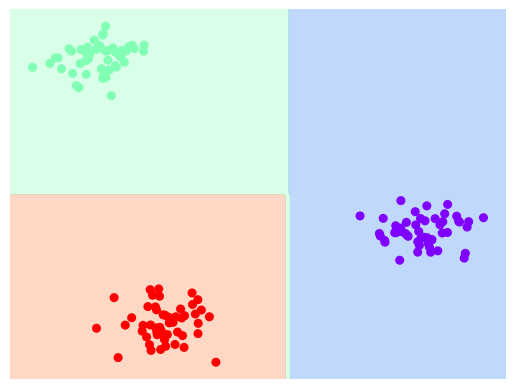

In [79]:
visualize_classifier(model, X, y)

[Text(0.6, 0.8333333333333334, 'x[0] <= -0.732\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4, 0.5, 'x[1] <= 1.175\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 50\nvalue = [0, 0, 50]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 50\nvalue = [0, 50, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.7, 0.6666666666666667, '  False')]

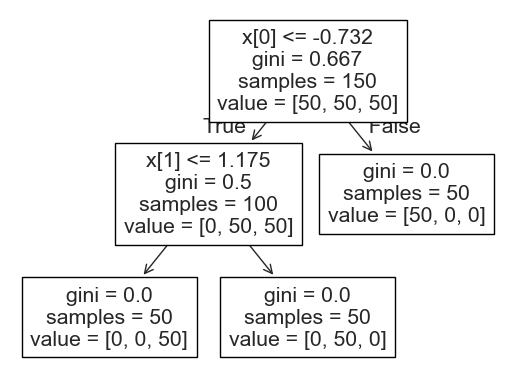

In [80]:
#트리 그리는 기능

from sklearn.tree import plot_tree
plot_tree(model)

### iris 예시로 해보기

In [84]:
from sklearn.datasets import load_iris

data = load_iris()
X, y = data.data, data.target

In [101]:
X.shape, y.shape

((150, 4), (150,))

In [102]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X,y)
y_pred = model.predict(X)
y_pred.shape

(150,)

In [103]:
# 성능 평가
from sklearn.metrics import accuracy_score

accuracy_score(y, y_pred)

0.96

In [104]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X,y)
y_pred = model.predict(X)
y_pred.shape

(150,)

In [105]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

1.0

In [106]:
model.get_depth()

5

In [107]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

[Text(0.5, 0.9166666666666666, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'petal length (cm) <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'petal width (cm) <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'petal width (cm) <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamp

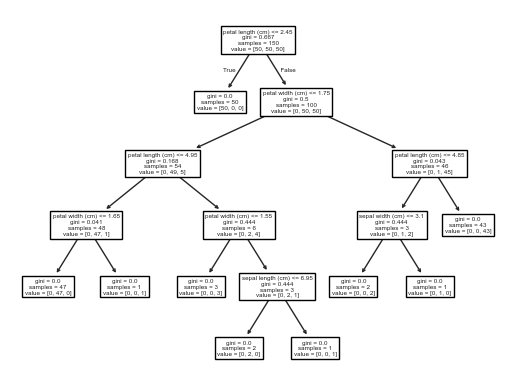

In [108]:
plot_tree(model, feature_names=data.feature_names)

지금은 과적합!!

앙상블 비유 설명
이진트리를 약화시킨 것을 여러개 작동 시키면 단독보다 정확도가 올라간다
+ 그럼 약화(배깅:bagging)시키는 방법은?
1. 트레이닝할때 데이터를 일부만 사용한다! 예를들어 150개중에 랜덤으로 100개만 뽑아서 트레이닝
2. 또는 feature를 일부만 사용한다.

### 추정 모델의 앙상블 : Random Forests

In [111]:
from sklearn.tree import DecisionTreeClassifier


In [112]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X,y)
y_pred = model.predict(X)
y_pred.shape

(150,)

In [114]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

1.0

In [116]:
# visualize_classifier(model, X, y);

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

In [152]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [153]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
y_pred1.shape

(38,)

In [154]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
y_pred2.shape

(38,)

In [155]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred1), accuracy_score(y_test, y_pred2)

(0.9210526315789473, 0.9210526315789473)